In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_2024 = pd.read_csv('2024_data.csv',na_values=["Filtration system","Template for initial cell formulas"])
df_2023 = pd.read_csv('2023_data.csv',na_values=["Filtration system","Template for initial cell formulas"])
df_2022 = pd.read_csv('2022_data.csv',na_values=["Filtration system","Template for initial cell formulas"])

In [3]:
shared = [col for col in df_2023.columns if (col in df_2024.columns) if (col in df_2022.columns)]

In [4]:
df_2022 = df_2022[shared]
df_2023 = df_2023[shared]
df_2024 = df_2024[shared]
df_main = df_2022.append(df_2023)
df_main = df_main.append(df_2024)

df_main = df_main[df_main["Timestamp"].notna()]
df_main["Timestamp"]=pd.to_datetime(df_main["Timestamp"],errors="coerce")
df_main = df_main[df_main["Experiment name"].notna()]

In [5]:
print("start: ", min(df_main["Timestamp"]),"\n","end: ",max(df_main["Timestamp"]))

start:  2022-05-12 14:37:00 
 end:  2024-02-08 10:39:44


In [6]:
#df_main = df_main.sort_values(by = "Timestamp")
df_main = pd.read_csv('full_data_artemia_nan_removed.csv')
df_main = df_main[df_main["Timestamp"].notna()]
df_main["Timestamp"]=pd.to_datetime(df_main["Timestamp"],errors="coerce")
df_main = df_main[df_main["Experiment name"].notna()]
df_main

,Timestamp,Experiment name,Date,Day of Experiment,Time parameters taken,Temperature [C],pH [-],Salinity [ppt],Time feed set up,Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Tank volume (L),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,2022-05-14 07:22:55,X007b1 D1F13 SR,14/05,5,6:55:00 AM,NaN,NaN,NaN,6:59:59 AM,NaN,NaN,0.0,NaN,22.0,NaN,NaN,NaN,NaN,2.20,0.37
1,2022-05-14 07:22:55,X007b2 D1F21 SR,14/05,5,6:55:00 AM,NaN,NaN,NaN,6:59:59 AM,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.20,0.37
2,2022-05-14 07:22:55,X007b D1F21 SR,14/05,5,6:55:00 AM,29.1,7.70,31.6,6:59:59 AM,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.40,0.31
3,2022-05-15 02:56:57,X007b2 D1F21 SR,15/05,6,10:44:59 AM,30.0,6.00,34.6,11:00:00 AM,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.97,0.51
4,2022-05-15 03:01:31,X007b1 D1F13 SR,15/05,6,10:54:59 AM,28.4,6.70,31.7,11:00:00 AM,NaN,NaN,0.0,NaN,22.0,NaN,NaN,NaN,NaN,3.09,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,2024-02-06 11:27:40,"X192c D3 to D1 Fe41 SP,BY - XL",2/6/2024,7,11:29:59 AM,27.8,7.89,42.0,NaN,NaN,NaN,NaN,NaN,NaN,240.0,18.409000,5.0,19.473667,0.21,0.00
3041,2024-02-07 09:27:32,"X190a D2Fe40 BY, BM - 2IBCs+XL",2/7/2024,22,10:00,27.3,7.99,48.0,17:30,48.0,5.0,0.0,241.6,11.0,750.0,18.723000,5.0,33.368000,2.93,0.00
3042,2024-02-07 10:56:03,"X192b D3 to D1 Fe41 SP,BY - XL",2/7/2024,12,11:00:00 AM,26.9,7.78,44.0,17:30,15.0,2.0,0.0,30.4,17.0,240.0,18.338000,5.0,22.060333,0.74,0.00
3043,2024-02-08 10:36:41,"X190a D2Fe40 BY, BM - 2IBCs+XL",2/8/2024,23,9:00:00 AM,26.7,7.93,50.0,14:00,49.0,5.0,0.0,246.0,10.0,750.0,18.417000,5.0,34.880833,3.29,0.00


In [7]:
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

start = min(df_main["Timestamp"])
six_months = start + relativedelta(months=6)
twelve_months = six_months + relativedelta(months=6)
eighteen_months = twelve_months + relativedelta(months=6)
twentyfour_months = eighteen_months + relativedelta(months=6)

In [8]:
mask = (df_main['Timestamp'] >= eighteen_months) & (df_main['Timestamp'] < twentyfour_months)
df_24mo = df_main.loc[mask]
mask = (df_main['Timestamp'] >= twelve_months) & (df_main['Timestamp'] < eighteen_months)
df_18mo = df_main.loc[mask]
mask = (df_main['Timestamp'] >= six_months) & (df_main['Timestamp'] < twelve_months)
df_12mo = df_main.loc[mask]
mask = (df_main['Timestamp'] < six_months)
df_6mo = df_main.loc[mask]

In [112]:
#between 2022-05-12 -> 2022-11-12 : 137 experiments
#between 2022-11-12 -> 2023-05-12 : 102 experiments
#between 2023-05-12 -> 2023-11-12 : 108 experiments
#between 2023-11-12 -> 2024-05-12 : 23 experiments

In [9]:
len(df_24mo)+len(df_18mo)+len(df_6mo)+len(df_12mo)

3035

In [22]:
time_dfs = [df_6mo,df_12mo,df_18mo,df_24mo]
time_dfs_1 = [df_6mo,df_12mo,df_18mo,df_24mo]
#this is where we skip the "-"
for df in time_dfs:
    df["Day of Experiment"] = pd.to_numeric(df["Day of Experiment"],errors="coerce")


time_lengths = ["0-6", "6-12", "12-18", "18-Present"]
n_exps = []
tank_vols = []
start_dates_list = []
end_dates_list = []
mean_exp_length = []
median_exp_length = []
longest_exp = []

for i in range(0,len(time_lengths)):
    n_exps.append(time_dfs[i]["Experiment name"].nunique())
    tank_vols.append(time_dfs[i]['Tank volume (L)'].median())
    start_tmp = min(time_dfs[i]["Timestamp"])
    end_tmp = max(time_dfs[i]["Timestamp"])
    start_dates_list.append(str(start_tmp).split(" ")[0])
    end_dates_list.append(str(end_tmp).split(" ")[0])
    df_tmp = time_dfs[i]
    max_days = []
    med_days = []
    for exp in df_tmp["Experiment name"].unique():
        df_tmp2 = df_tmp[df_tmp["Experiment name"]==exp]
        max_days.append(max(df_tmp2["Day of Experiment"]))
        max_days = [x for x in max_days if str(x) != 'nan']
    mean_exp_length.append(np.mean(max_days))
    median_exp_length.append(np.median(max_days))
    longest_exp.append(max(max_days))

    
test_df = pd.DataFrame({"Timescale (months elapsed)":time_lengths,"Number of Exps":n_exps,"Start of Period":start_dates_list,
                       "End of Period":end_dates_list,"Mean Exp Length*":mean_exp_length,
                       "Longest Exp*":longest_exp, "Longest Exp*":["-","-",51,"-"],
                        "Mean length*":["-","-",10.242990654205608,"-"], 'Tank Vol Med':tank_vols})

In [23]:
test_df

,Timescale (months elapsed),Number of Exps,Start of Period,End of Period,Mean Exp Length*,Longest Exp*,Mean length*,Tank Vol Med
0,0-6,142,2022-05-14,2022-11-14,9.309859,-,-,10.0
1,6-12,103,2022-11-15,2023-05-13,9.352941,-,-,195.0
2,12-18,107,2023-05-14,2023-11-13,9.707547,51,10.242991,31.0
3,18-Present,23,2023-11-14,2024-02-08,8.913043,-,-,240.0


In [12]:
#the technically longest experiment is called "X154a D1Fe21 SR - BT", ran in df_18mo (18 month period)

In [13]:
tmp_lst = []
for exp in df_18mo["Experiment name"].unique():
    df_tmp = df_18mo[df_18mo["Experiment name"]==exp]
    tmp_lst.append(max(df_tmp["Day of Experiment"]))
    

In [14]:
for i in range(0,len(tmp_lst)):
    if tmp_lst[i] in [23]:
        tmp_lst[i] = 51.0
        break
corrected_lst = [x for x in tmp_lst if str(x) != 'nan']

In [15]:
df_main["Day of Experiment"].unique()

array(['5', '6', '7', '1', '8', '2', '3', '9', '4', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', nan, '21', '22',
       '23', '24', '25', '26', '27', '28', '22-29', '23-30', '24-31',
       '25-32', '26-33', '27-34', '28-35', '29-36', '30-37', '31-38',
       '32-39', '33-40', '34-41', '35-42', '36-43', '37-44', '38-45',
       '39-46', '40-47', '41-48', '42-49', '43-50', '44-50', '45-51'],
      dtype=object)

In [16]:
#now on standard deviation of variables for each 6 month period
not_need = ["Timestamp","Experiment name","Date","Day of Experiment","Time parameters taken"]#,"Notes",'Water change [%]']
std_df_2022 = pd.DataFrame()

In [17]:
tmp_6mo = df_6mo.drop(columns=not_need)
tmp_12mo = df_12mo.drop(columns=not_need)
tmp_18mo = df_18mo.drop(columns=not_need)
tmp_24mo = df_24mo.drop(columns=not_need)
tmp_dfs = [tmp_6mo,tmp_12mo,tmp_18mo,tmp_24mo]

In [18]:
for nom in tmp_6mo.columns:
    for i in tmp_6mo.index:
        try:
            tmp_6mo.at[i, nom] = float(tmp_6mo.loc[i, nom])
        except:
            tmp_6mo.at[i, nom] = np.nan
    print(nom, np.std(tmp_6mo[nom]))

Temperature [C] 6.650459246746897
pH [-] 0.7600449391044048
Salinity [ppt] 13.27915981173314
Time feed set up nan
Concentration of feed solution (g/L) 41.41157874710428
Volume of feed solution given (L) 1.6525326730861678
Feed not fed DM (g/day) 63.70870472229921
Feed fed DM (g/day) 123.74306665982371
Actual feed ration given (% BW) 26.571848472068808
Tank volume (L) 356.3642538882341
Weight wet sieve [g] 27.274650154916756
Water drained [l] 103.99870668758648
Measured weight S+A [g] 160.90700840589594
Artemia weight [g/l] 1.1078247036824893
Individual weight wet [mg/animal] 0.843041983547491


In [19]:
arr_6mo = []
arr_12mo = []
arr_18mo = []
arr_24mo = []
arrs = [arr_6mo, arr_12mo, arr_18mo, arr_24mo]

for k in range(0,len(time_lengths)):
    print(time_lengths[k], "\n")
    df = tmp_dfs[k]
    
    for nom in df.columns:
        for i in df.index:
            try:
                df.at[i,nom] = float(df.loc[i,nom])
            except:
                df.at[i,nom] = np.nan
        #print(nom, np.std(df[nom]))
        arrs[k].append(np.std(df[nom]))
        
    print("\n")

0-6 



6-12 



12-18 



18-Present 





In [91]:
keys = tmp_24mo.columns
standard_dev = {}

In [92]:
for i in range(len(keys)):
    standard_dev.update({keys[i]: [arr_6mo[i],arr_12mo[i],arr_18mo[i],arr_24mo[i]]})

In [93]:
pd.DataFrame(standard_dev)

,Temperature [C],pH [-],Salinity [ppt],Time feed set up,Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Tank volume (L),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,6.650459,0.760045,13.279160,NaN,41.411579,1.652533,63.708705,123.743067,26.571848,356.364254,27.274650,103.998707,160.907008,1.107825,0.843042
1,1.070016,0.381614,1.991159,NaN,29.602055,2.322614,58.151873,161.440354,77.789719,488.896022,3.551392,195.309477,279.342829,1.348038,0.159892
2,1.531140,0.990873,13.872361,721.829003,34.818416,2.037781,29.345481,93.027189,18.757027,273.808937,3.493015,94.586233,137.640363,2.442403,0.426726
3,1.289827,0.367245,8.698955,NaN,20.326447,2.615546,6.789241,66.619562,61.848565,334.988528,2.059982,1.762510,5.260803,1.276504,0.714622


In [94]:
arr_6mo_2 = []
arr_12mo_2 = []
arr_18mo_2 = []
arr_24mo_2 = []
arrs_2 = [arr_6mo_2, arr_12mo_2, arr_18mo_2, arr_24mo_2]
for k in range(0,len(time_lengths)):

    #print(time_lengths[k], "\n")
    df = tmp_dfs[k]
    
    for nom in df.columns:
        #for i in df.index:
          #  try:
           #     df.at[i,nom] = float(df.loc[i,nom])
           # except:
           #     df.at[i,nom] = np.nan
        #print(nom, np.std(df[nom]))
        arrs_2[k].append(np.var(df[nom]))
        
    print("\n")

In [95]:
keys = tmp_24mo.columns
variance = {}
for i in range(len(keys)):
    variance.update({keys[i]: [arr_6mo_2[i],arr_12mo_2[i],arr_18mo_2[i],arr_24mo_2[i]]})

In [96]:
pd.DataFrame(variance)

,Temperature [C],pH [-],Salinity [ppt],Time feed set up,Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Tank volume (L),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,44.228608,0.577668,176.336085,NaN,1714.918854,2.730864,4058.799057,15312.346546,706.063131,126995.481449,743.906541,10815.730993,25891.065354,1.227276,0.710720
1,1.144935,0.145629,3.964714,NaN,876.281668,5.394534,3381.640370,26062.987799,6051.240366,239019.320358,12.612384,38145.791919,78032.416138,1.817205,0.025565
2,2.344390,0.981829,192.442397,521037.109375,1212.322090,4.152551,861.157235,8654.057860,351.826070,74971.334185,12.201157,8946.555524,18944.869623,5.965331,0.182095
3,1.663655,0.134869,75.671822,NaN,413.164428,6.841080,46.093790,4438.166004,3825.245032,112217.313683,4.243526,3.106440,27.676044,1.629463,0.510684


In [136]:
from scipy.stats import iqr
arr_6mo_3 = []
arr_12mo_3 = []
arr_18mo_3 = []
arr_24mo_3 = []
arrs_3 = [arr_6mo_3, arr_12mo_3, arr_18mo_3, arr_24mo_3]
for k in range(0,len(time_lengths)):
    df = tmp_dfs[k]
    for nom in df.columns:
        col = df[nom].dropna()
        arrs_3[k].append(iqr(col))

In [137]:
keys = tmp_24mo.columns
iqr = {}
for i in range(len(keys)):
    iqr.update({keys[i]: [arr_6mo_3[i],arr_12mo_3[i],arr_18mo_3[i],arr_24mo_3[i]]})

In [140]:
df_iqr = pd.DataFrame(iqr)
df_iqr

,Temperature [C],pH [-],Salinity [ppt],Time feed set up,Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Tank volume (L),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,2.25,0.5500,4.9,NaN,39.225,0.70,0.30,75.70,25.0,240.0,0.248,3.3,3.232000,1.195,0.295
1,1.20,0.4200,2.0,NaN,43.800,4.15,16.35,189.45,20.0,890.0,0.034,0.0,8.045000,1.510,0.000
2,1.80,0.4475,23.0,1335.0,36.000,3.52,4.80,89.00,17.0,209.0,0.000,3.0,8.390000,1.630,0.000
3,1.40,0.2750,11.0,NaN,18.000,1.09,1.50,49.20,5.0,719.0,0.161,3.0,3.987833,1.095,0.000


In [100]:
pd.DataFrame(variance)

,Temperature [C],pH [-],Salinity [ppt],Time feed set up,Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Tank volume (L),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,44.228608,0.577668,176.336085,NaN,1714.918854,2.730864,4058.799057,15312.346546,706.063131,126995.481449,743.906541,10815.730993,25891.065354,1.227276,0.710720
1,1.144935,0.145629,3.964714,NaN,876.281668,5.394534,3381.640370,26062.987799,6051.240366,239019.320358,12.612384,38145.791919,78032.416138,1.817205,0.025565
2,2.344390,0.981829,192.442397,521037.109375,1212.322090,4.152551,861.157235,8654.057860,351.826070,74971.334185,12.201157,8946.555524,18944.869623,5.965331,0.182095
3,1.663655,0.134869,75.671822,NaN,413.164428,6.841080,46.093790,4438.166004,3825.245032,112217.313683,4.243526,3.106440,27.676044,1.629463,0.510684


In [173]:
df_add = pd.read_csv('2023_2024_data_shared_cols_NaN_removed.csv')
df_add

,Timestamp,Experiment name,Date,Day of Experiment,Time parameters taken,Temperature [C],pH [-],Average DO [mg/L),Average ORP [mV],Tank volume (L),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,12/12/2022 7:25:28,X080a D30Fe1 SR,12/12/2022,1,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,0.00,0.0
1,12/12/2022 7:25:51,X080b D1Fe1 SR,12/12/2022,1,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,0.00,0.0
2,12/12/2022 7:27:02,X080c D30Fe9 SR,12/12/2022,1,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,0.00,0.0
3,12/12/2022 7:27:32,X080d D1Fe9 SR,12/12/2022,1,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,0.00,0.0
4,12/13/2022 0:56:24,X080a D30Fe1 SR,12/13/2022,2,8:49:59 AM,25.4,6.94,7.190,64.0,10.0,18.596000,5.0,24.624000,1.21,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,2/7/2024 10:56:03,"X192b D3 to D1 Fe41 SP,BY - XL",2/7/2024,12,11:00:00 AM,26.9,7.78,5.415,150.0,240.0,18.338000,5.0,22.060333,0.74,0.0
1841,2/7/2024 18:44:00,X193a - bicarb test tank - XL,2/7/2024,1,18:04,NaN,8.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1842,2/8/2024 10:36:41,"X190a D2Fe40 BY, BM - 2IBCs+XL",2/8/2024,23,9:00:00 AM,26.7,7.93,3.480,49.5,750.0,18.417000,5.0,34.880833,3.29,0.0
1843,2/8/2024 10:37:42,"X192b D3 to D1 Fe41 SP,BY - XL",2/8/2024,13,9:00:00 AM,26.8,8.00,6.400,142.5,240.0,18.363167,5.0,21.974333,0.72,0.0


# Making some plots

In [102]:
test_df

,Timescale (months elapsed),Number of Exps,Start of Period,End of Period,Mean Exp Length*,Longest Exp*,Mean length*
0,0-6,142,2022-05-14,2022-11-14,9.309859,-,-
1,6-12,103,2022-11-15,2023-05-13,9.352941,-,-
2,12-18,107,2023-05-14,2023-11-13,9.707547,51,10.242991
3,18-Present,23,2023-11-14,2024-02-08,8.913043,-,-


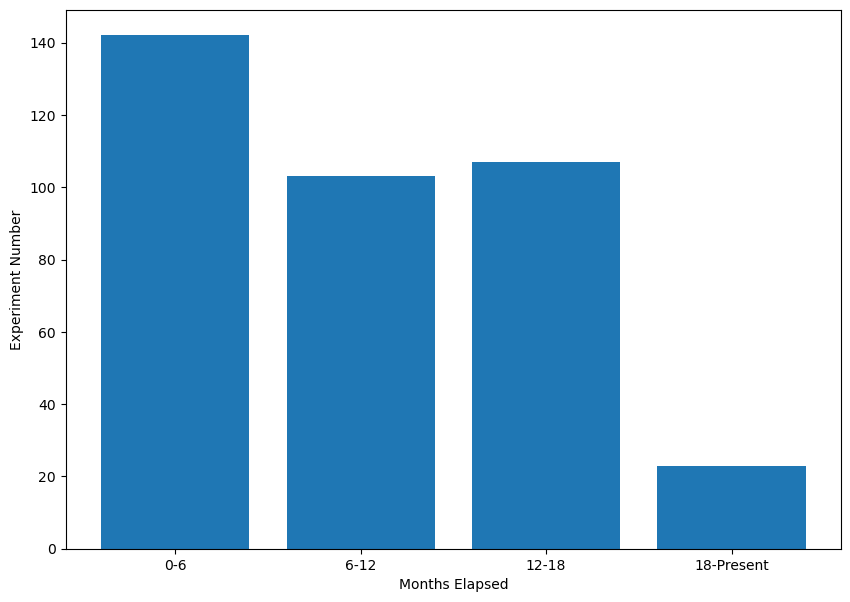

In [142]:
plt.figure(figsize=(10,7))
plt.bar(x=test_df['Timescale (months elapsed)'].values, height=test_df['Number of Exps'].values)
plt.xlabel('Months Elapsed')
plt.ylabel('Experiment Number')
plt.savefig('exp_num_bar.png')
plt.show()

In [126]:
bt_dic = {'six':0, 'twelve':0, 'eighteen':0, 'twentyfour':0}
dfs = [df_6mo, df_12mo, df_18mo, df_24mo]
for d in range(len(dfs)):
    bt = [i for i in dfs[d]['Experiment name'].unique() if 'BT' in i]
    print(list(bt_dic.keys())[d])
    bt_dic[list(bt_dic.keys())[d]] += len(bt)

six
twelve
eighteen
twentyfour


In [127]:
bt_dic

{'six': 0, 'twelve': 0, 'eighteen': 40, 'twentyfour': 10}

In [143]:
df_iqr

,Temperature [C],pH [-],Salinity [ppt],Time feed set up,Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Tank volume (L),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,2.25,0.5500,4.9,NaN,39.225,0.70,0.30,75.70,25.0,240.0,0.248,3.3,3.232000,1.195,0.295
1,1.20,0.4200,2.0,NaN,43.800,4.15,16.35,189.45,20.0,890.0,0.034,0.0,8.045000,1.510,0.000
2,1.80,0.4475,23.0,1335.0,36.000,3.52,4.80,89.00,17.0,209.0,0.000,3.0,8.390000,1.630,0.000
3,1.40,0.2750,11.0,NaN,18.000,1.09,1.50,49.20,5.0,719.0,0.161,3.0,3.987833,1.095,0.000


In [174]:
df_add = df_add[df_add["Timestamp"].notna()]
df_add["Timestamp"]=pd.to_datetime(df_add["Timestamp"],errors="coerce")
df_add = df_add[df_add["Experiment name"].notna()]
mask = (df_add['Timestamp'] >= eighteen_months) & (df_add['Timestamp'] < twentyfour_months)
df_24add = df_add.loc[mask]
mask = (df_add['Timestamp'] >= twelve_months) & (df_add['Timestamp'] < eighteen_months)
df_18add = df_add.loc[mask]
mask = (df_add['Timestamp'] >= six_months) & (df_add['Timestamp'] < twelve_months)
df_12add = df_add.loc[mask]
mask = (df_add['Timestamp'] < six_months)
df_6add = df_add.loc[mask]

In [175]:
tmp_6add = df_6add.drop(columns=not_need)
tmp_12add = df_12add.drop(columns=not_need)
tmp_18add = df_18add.drop(columns=not_need)
tmp_24add = df_24add.drop(columns=not_need)
tmp_dfs = [tmp_6add,tmp_12add,tmp_18add,tmp_24add]

In [178]:
from scipy.stats import iqr
arr_6mo_3 = []
arr_12mo_3 = []
arr_18mo_3 = []
arr_24mo_3 = []
arrs_3 = [arr_6mo_3, arr_12mo_3, arr_18mo_3, arr_24mo_3]
for k in range(0,len(time_lengths)):
    df = tmp_dfs[k]
    for nom in df.columns:
        #try:
        col = df[nom].dropna().astype(np.float32)
        arrs_3[k].append(iqr(col))
        #except:
keys = tmp_24add.columns
iqr = {}
for i in range(len(keys)):
    iqr.update({keys[i]: [arr_6mo_3[i],arr_12mo_3[i],arr_18mo_3[i],arr_24mo_3[i]]})

In [180]:
df_iqradd = pd.DataFrame(iqr)
df_iqradd.fillna(0, inplace=True)
df_iqradd

,Temperature [C],pH [-],Average DO [mg/L),Average ORP [mV],Tank volume (L),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,0.000000,0.0000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0000,0.0
1,1.200001,0.3900,2.02000,9.0,890.0,0.034000,0.0,7.672500,1.3925,0.0
2,1.799999,0.4425,2.27125,14.5,209.0,0.000000,3.0,8.390001,1.6300,0.0
3,1.500000,0.2700,1.48750,69.0,209.0,0.160999,3.0,3.987833,1.1000,0.0


In [181]:
plots = ['temp', 'pH', 'salinity', 'feed_given', 'av_do', 'av_orp']
cols = ['Temperature [C]', 'pH [-]', 'Salinity [ppt]', 'Actual feed ration given (% BW)', 'Average DO [mg/L)', 'Average ORP [mV]']

In [185]:
df_iqr['Average DO [mg/L)'] = df_iqradd['Average DO [mg/L)']
df_iqr['Average ORP [mV]'] = df_iqradd['Average ORP [mV]']
df_plot = df_iqr[cols]
df_plot

,Temperature [C],pH [-],Salinity [ppt],Actual feed ration given (% BW),Average DO [mg/L),Average ORP [mV]
0,2.25,0.5500,4.9,25.0,0.00000,0.0
1,1.20,0.4200,2.0,20.0,2.02000,9.0
2,1.80,0.4475,23.0,17.0,2.27125,14.5
3,1.40,0.2750,11.0,5.0,1.48750,69.0


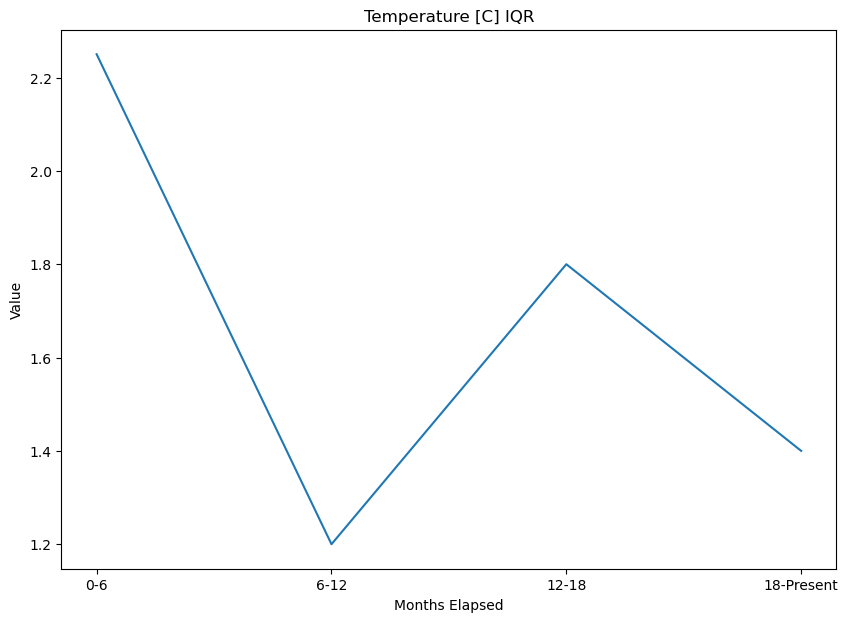

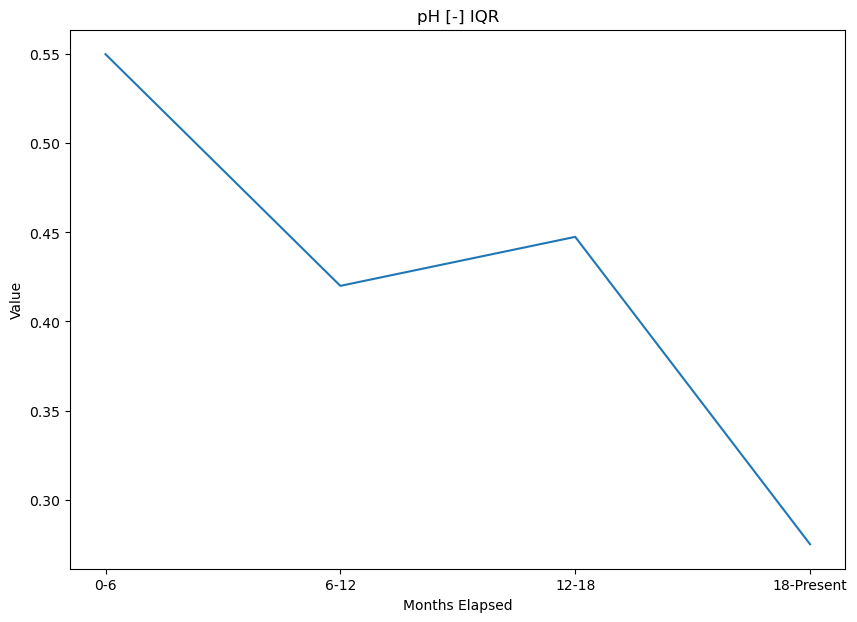

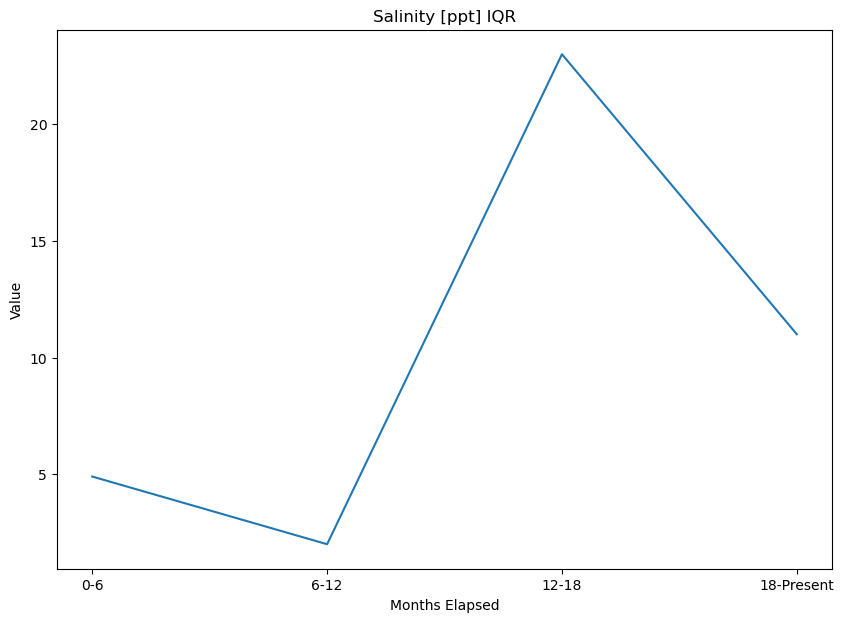

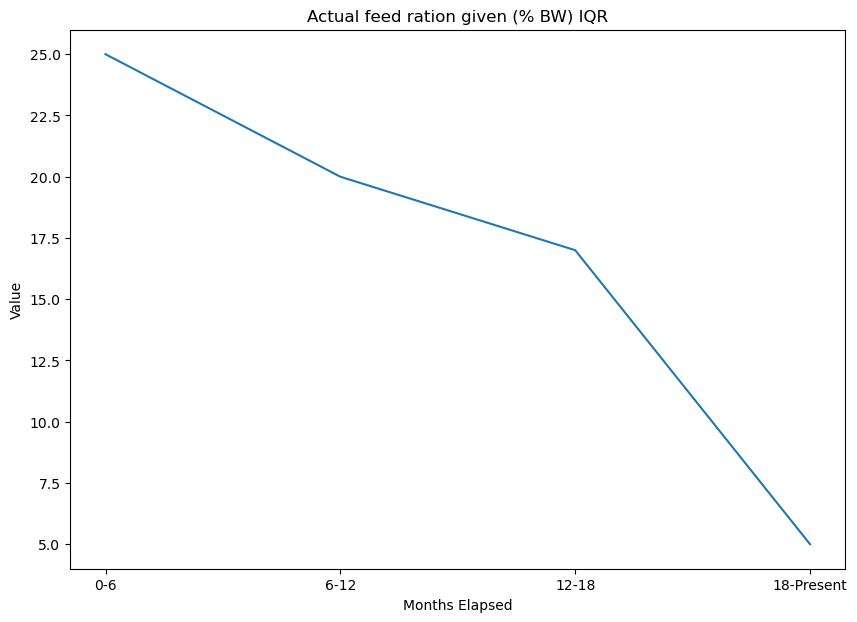

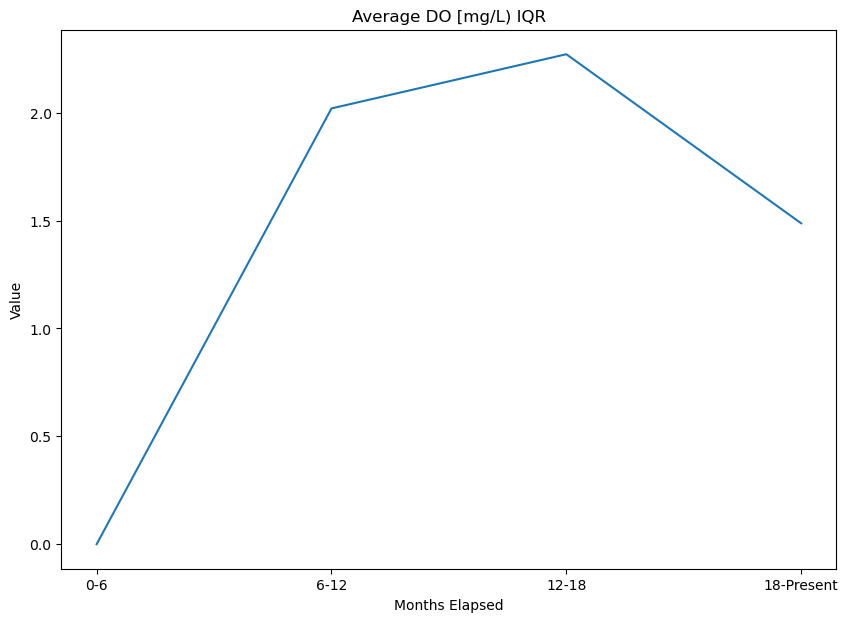

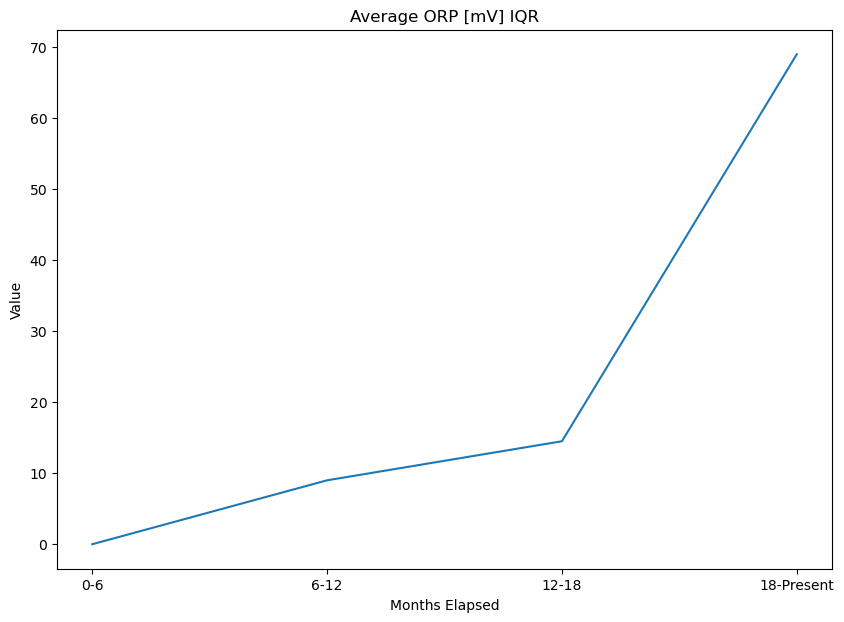

In [191]:
for i in range(len(df_plot.columns)):    
    plt.figure(figsize=(10,7))
    plt.title(cols[i]+' IQR')
    plt.xlabel('Months Elapsed')
    plt.ylabel('Value')
    plt.plot(time_lengths, df_plot[cols[i]].values)
    plt.savefig(f'{plots[i]}_months.png')
    plt.show()